# 1. Data Preparation:

Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [2]:
# prompt: Load the dataset "/content/heart_disease.xlsx" 

import pandas as pd
df = pd.read_excel("D:\EXCELR\Assignments\Decision Tree\heart_disease.xlsx")

In [3]:
# prompt: Perform EDA to understand the structure of the df.

# Display basic information about the DataFrame
print(df.info())

# Display summary statistics of numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Explore the distribution of categorical variables
for col in df.select_dtypes(include=['object']):
  print(df[col].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes
None
           age                  Age in years
count       12                            12
unique      12                            12
top     Gender  Gender ; Male - 1, Female -0
freq         1                             1
age             0
Age in years    0
dtype: int64
age
Gender      1
cp          1
trestbps    1
chol        1
fbs         1
restecg     1
thalch      1
exang       1
oldpeak     1
slope       1
thal        1
num         1
Name: count, dtype: int64
Age in years
Gender ; Male - 1, Female -0                                                                                                                                                                       

In [4]:
# prompt: Check for missing values in df above

# Check for missing values
print(df.isnull().sum())

age             0
Age in years    0
dtype: int64


In [5]:
# prompt: Check for outliers in df above

import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=['float', 'int']).columns

# Box plots to visualize outliers
for col in numerical_cols:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f"Box Plot of {col}")
  plt.show()

# Alternatively, use IQR method for outlier detection
for col in numerical_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(f"Outliers in {col}:")
  print(outliers)


In [6]:
# prompt: Check if there is any inconsistencies in the df above

# Check for inconsistencies in categorical variables
for col in df.select_dtypes(include=['object']):
  unique_values = df[col].unique()
  print(f"Unique values in {col}: {unique_values}")
  # Check for unexpected values or typos
  # Example:
  if col == 'sex':
    if any(val not in [0, 1] for val in unique_values):
      print(f"Inconsistent values found in {col}")

# Check for inconsistencies in numerical variables
for col in numerical_cols:
  # Check for values outside the expected range
  # Example:
  if col == 'age':
    if any(val < 0 or val > 120 for val in df[col]):
      print(f"Inconsistent values found in {col}")

  # Check for impossible combinations
  # Example:
  if col == 'resting_blood_pressure':
    if any((df['age'] < 18) & (df['resting_blood_pressure'] > 120)):
      print("Inconsistent combination: young age with high blood pressure")

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
  print("Duplicate rows found:")
  print(duplicate_rows)


Unique values in age: ['Gender' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalch' 'exang'
 'oldpeak' 'slope' 'thal' 'num']
Unique values in Age in years: ['Gender ; Male - 1, Female -0' 'Chest pain type' 'Resting blood pressure'
 'cholesterol measure'
 '(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)'
 "ecg observation at resting condition,   -- Value 0: normal\n        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria"
 'maximum heart rate achieved' 'exercise induced angina'
 'ST depression induced by exercise relative to rest'
 'the slope of the peak exercise ST segment' 'Thal'
 'target [0=no heart disease; 1,2,3,4 = stages of heart disease ]']


In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Handle missing values for numerical features
# Ensure numerical_cols is correctly defined
numerical_cols = df.select_dtypes(include=['float', 'int']).columns 

# Proceed if there are numerical columns
if len(numerical_cols) > 0:
    imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
    df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
    
    # Scale numerical features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[numerical_cols])
    scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)
    
    # Combine processed features (if there were numerical columns)
    processed_df = pd.concat([scaled_df, encoded_df], axis=1)
    
else:
    # Encode categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns
    encoder = OneHotEncoder(handle_unknown='ignore')  # Handle unknown categories during testing
    encoded_data = encoder.fit_transform(df[categorical_cols])
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_cols))
    
    # If no numerical columns, the processed dataframe is just the encoded one
    processed_df = encoded_df

print(processed_df.head())

   age_Gender  age_chol  age_cp  age_exang  age_fbs  age_num  age_oldpeak  \
0         1.0       0.0     0.0        0.0      0.0      0.0          0.0   
1         0.0       0.0     1.0        0.0      0.0      0.0          0.0   
2         0.0       0.0     0.0        0.0      0.0      0.0          0.0   
3         0.0       1.0     0.0        0.0      0.0      0.0          0.0   
4         0.0       0.0     0.0        0.0      1.0      0.0          0.0   

   age_restecg  age_slope  age_thal  ...  \
0          0.0        0.0       0.0  ...   
1          0.0        0.0       0.0  ...   
2          0.0        0.0       0.0  ...   
3          0.0        0.0       0.0  ...   
4          0.0        0.0       0.0  ...   

   Age in years_Gender ; Male - 1, Female -0  \
0                                        1.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                               

In [9]:
# prompt: Split the encoded_df into training and testing sets and X as age

from sklearn.model_selection import train_test_split

# Assuming 'target' is the name of your target variable column
y = encoded_df['age_Gender']  # Replace 'target' with the actual column name
X = encoded_df.drop('age_Gender', axis=1)  # Remove target variable from features

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (9, 23)
X_test shape: (3, 23)
y_train shape: (9,)
y_test shape: (3,)


In [11]:
# prompt: Implement a Decision Tree Classification model using a library like scikit-learn.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,zero_division=1)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.6666666666666666
Confusion Matrix:
 [[2 0]
 [1 0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80         2
         1.0       1.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.83      0.50      0.40         3
weighted avg       0.78      0.67      0.53         3



In [12]:
# prompt: Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC)

# Assuming you want to try a Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred_rf, zero_division=1))

# Calculate ROC-AUC score if it's a binary classification problem
# Assuming 'y_test' and 'y_pred_rf' contain probabilities for the positive class
# If not, adjust the code accordingly
try:
  roc_auc = roc_auc_score(y_test, y_pred_rf)
  print("ROC-AUC Score:", roc_auc)
except ValueError:
  print("ROC-AUC score is not applicable for multi-class classification.")


Random Forest Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80         2
         1.0       1.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.83      0.50      0.40         3
weighted avg       0.78      0.67      0.53         3

ROC-AUC Score: 0.5


In [13]:
# prompt: Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new Decision Tree model with the best hyperparameters
best_clf = DecisionTreeClassifier(**best_params)

# Train the best model
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_clf.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with Best Hyperparameters:", accuracy_best)

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred_best, zero_division=1))


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Accuracy with Best Hyperparameters: 0.6666666666666666
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80         2
         1.0       1.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.83      0.50      0.40         3
weighted avg       0.78      0.67      0.53         3



Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80         2
         1.0       1.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.83      0.50      0.40         3
weighted avg       0.78      0.67      0.53         3



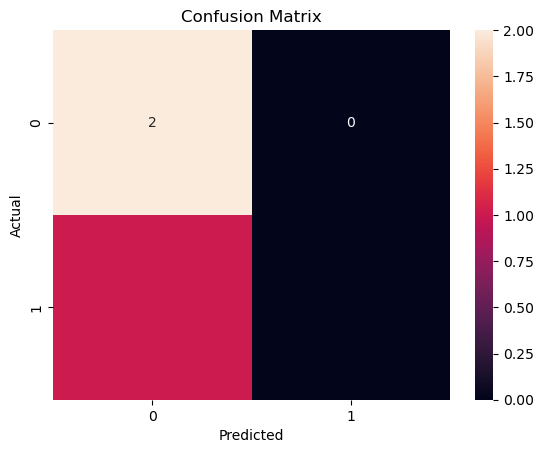

In [14]:
# prompt: Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

# Assuming you have already trained the Decision Tree model and obtained predictions (y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)  # Replace 'accuracy' with the actual variable name

# Print the classification report
print(classification_report(y_test, y_pred, zero_division=1))

# Analyze the results:
# - Accuracy: Gives an overall percentage of correct predictions.
# - Precision: For each class, how many of the predicted positive instances were actually positive.
# - Recall: For each class, how many of the actual positive instances were correctly predicted.
# - F1-score: A harmonic mean of precision and recall, providing a balanced metric.
# - Support: The number of instances of each class in the test set.

# Interpret the results based on the specific context of your problem and the relative importance of different metrics.
# For example:
# - If false positives are costly, focus on improving precision.
# - If false negatives are critical, prioritize increasing recall.
# - Consider the class imbalance (support) when interpreting the results.

# Additionally, you can visualize the confusion matrix for a more detailed breakdown of errors:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [15]:
# prompt: decision tree structure for above dataset

from sklearn.tree import export_text

# Assuming 'clf' is your trained DecisionTreeClassifier
tree_rules = export_text(clf, feature_names=X.columns.tolist())
print(tree_rules)


|--- class: 0

